<a href="https://colab.research.google.com/github/takatakaG/42tokyo/blob/master/bayse_ab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2023-08-06 07:39:22.192 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/ipykernel_launcher.py [ARGUMENTS]
<ipython-input-2-0c08f3563168>:81: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(samples_posterior_A, ax=ax, label='CVR of A')
<ipython-input-2-0c08f3563168>:82: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147e

DeltaGenerator()

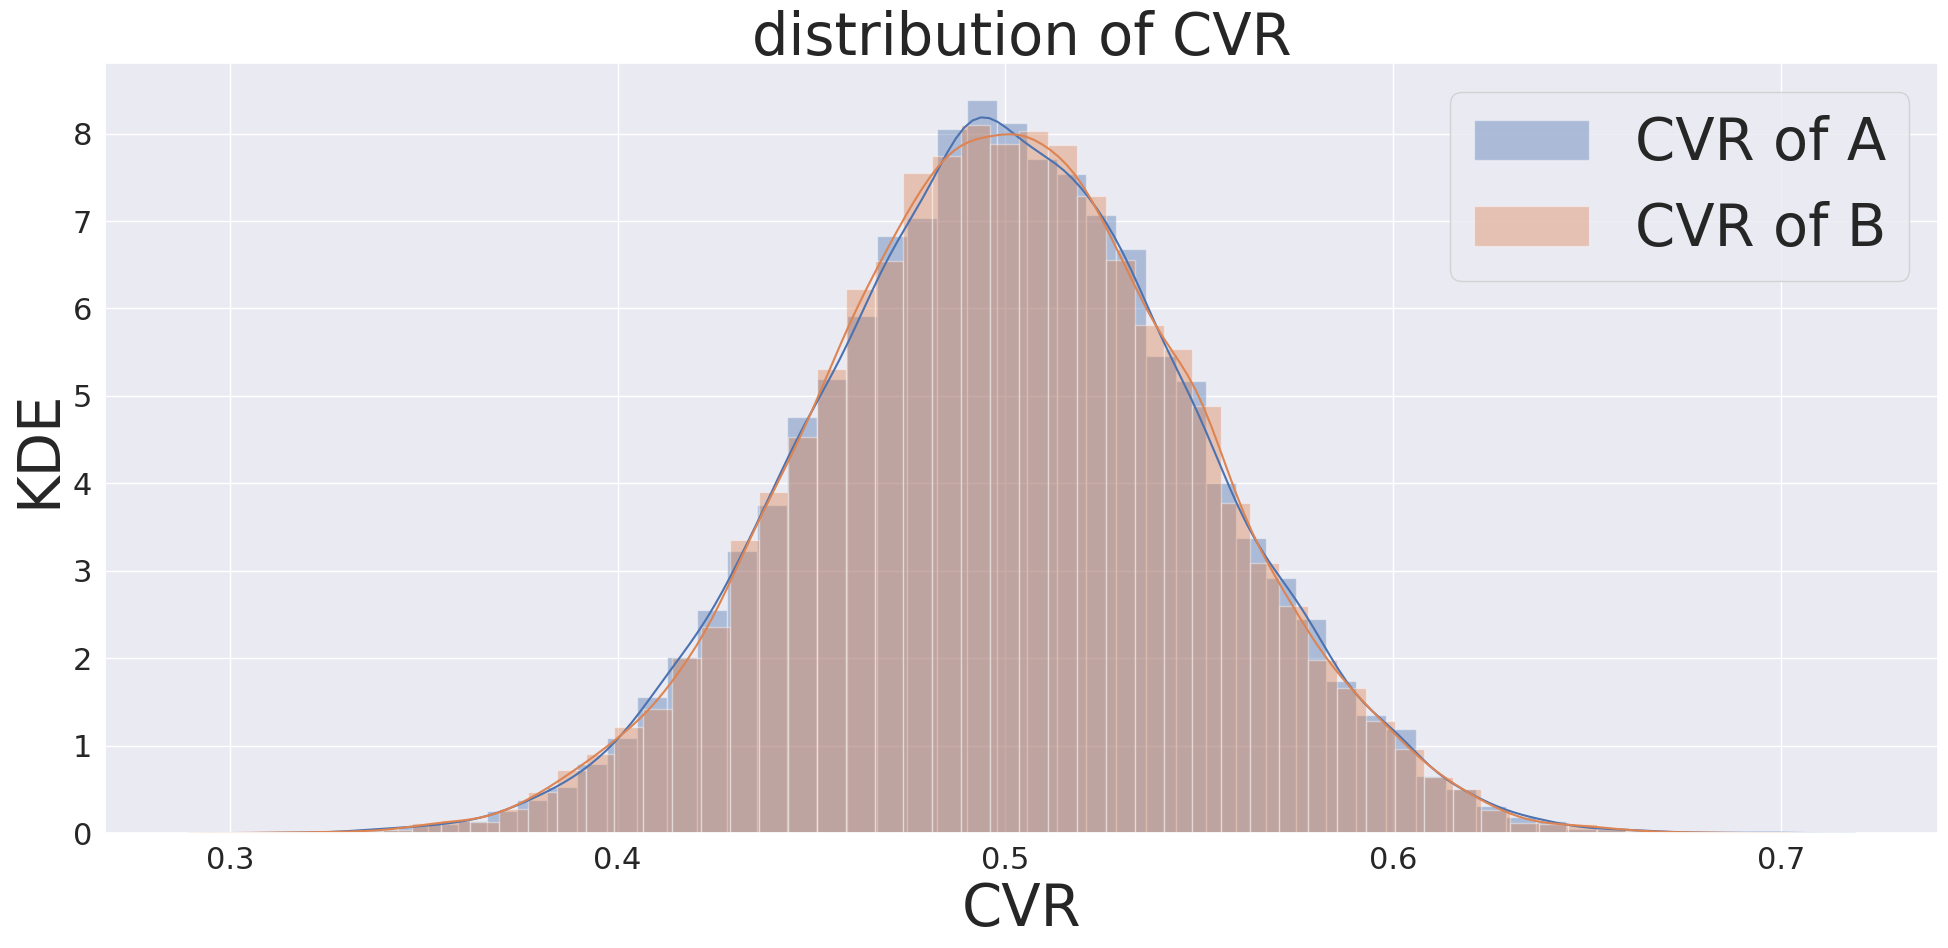

In [2]:
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set(font_scale=2)

# サイドバー
st.sidebar.markdown('A/Bテスト対象のデータを入力してください')
visitors_a = st.sidebar.number_input('Aの来訪者数', value=100)
conversion_a = st.sidebar.number_input('Aのコンバージョン数', value=50)
cvr_a = conversion_a / visitors_a
st.sidebar.markdown(f'Aのコンバージョン率: **{"{:.1%}".format(cvr_a)}**')

visitors_b = st.sidebar.number_input('Bの来訪者数', value=100)
conversion_b = st.sidebar.number_input('Bのコンバージョン数', value=50)
cvr_b = conversion_b / visitors_b
st.sidebar.markdown(f'Bのコンバージョン率: **{"{:.1%}".format(cvr_b)}**')

# メインコンテンツ
st.header('A/Bテストアプリ')
st.markdown(r'''A/Bテスト結果の来訪者数とコンバージョン数を入力することで、一般的なA/BテストおよびベイジアンA/Bテストによる信頼性を判定できます。''')
st.subheader('テスト対象')
st.markdown(rf'''
    <table>
      <tr>
        <th>パターン</th><th>来訪者数</th><th>コンバージョン数</th><th>コンバージョン率</th>
      </tr>
      <tr>
        <td>A</td><td>{visitors_a}</td><td>{conversion_a}</td><td>{"{:.1%}".format(cvr_a)}</td>
      </tr>
      <tr>
        <td>B</td><td>{visitors_b}</td><td>{conversion_b}</td><td>{"{:.1%}".format(cvr_b)}</td>
      </tr>
    </table>
    ''', unsafe_allow_html=True)
st.subheader('A/Bテスト')
st.markdown('一般的なA/Bテスト(統計的仮説検定)の結果です。分散不均等を仮定したt検定を使用しています。')

# t検定
a = np.zeros(visitors_a)
a[:conversion_a] = 1
b = np.zeros(visitors_ｂ)
b[:conversion_ｂ] = 1
res = stats.ttest_ind(a, b, equal_var=False)
# p値によって出力を変更
if res[1] <= 0.05:
  st.markdown(r'''
    <center><font size=7 color="#00B06B">95%の信頼度で有意差あり</font></center>
    ''', unsafe_allow_html=True)
elif res[1] <= 0.1:
  st.markdown(r'''
    <center><font size=7 color="#F2E700">90%の信頼度で有意差あり</font></center>
    ''', unsafe_allow_html=True)
else:
  st.markdown(r'''
    <center><font size=7 color="#FF4B00">有意差なし</font></center>
    ''', unsafe_allow_html=True)

# ベイジアンA/Bテスト
# 参考: https://techblog.zozo.com/entry/bayesian_ab
# 事前分布をベータ分布とすることで、解析的に事後分布を求められる
st.subheader('ベイジアンA/Bテスト')
st.markdown('ベイズ推論を活用したA/Bテストの結果です。A, BそれぞれのCVRがどの程度信用できるのかを確認できます。')
# 事前分布のパラメータのα、βを指定
alpha_prior = 1
beta_prior = 1
# 事後分布の算出
posterior_A = stats.beta(alpha_prior + conversion_a, beta_prior + visitors_a - conversion_a)
posterior_B = stats.beta(alpha_prior + conversion_b, beta_prior + visitors_b - conversion_b)
# サンプリング数
samples = 20000
samples_posterior_A = posterior_A.rvs(samples)
samples_posterior_B = posterior_B.rvs(samples)
# A<Bとなる確率算出
prob = (samples_posterior_A < samples_posterior_B).mean()

# グラフ設定
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
sns.distplot(samples_posterior_A, ax=ax, label='CVR of A')
sns.distplot(samples_posterior_B, ax=ax, label='CVR of B')
ax.set_ylabel('KDE', fontsize='xx-large')
ax.set_xlabel('CVR', fontsize='xx-large')
ax.set_title('distribution of CVR', fontsize='xx-large')
ax.legend(loc='upper right', fontsize='xx-large')
fig.tight_layout()

# 可視化
st.subheader('CVRの信用度の分布')
st.pyplot(fig)
# CVRがA<Bとなる確率を表示
st.markdown(fr'''
  <center><font size=7>CVRがA < Bとなる確率: {"{:.1%}".format(prob)}</font></center>
  ''', unsafe_allow_html=True)